# Face Detection with Python using OpenCV

# Required Packages
 1.Python
 2.Numpy
 3.Matplotlib


In [1]:
# Importing necessary Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_img=cv2.imread('img.png')

In [3]:
type(raw_img)

numpy.ndarray

In [4]:
raw_img.shape

(288, 288, 3)

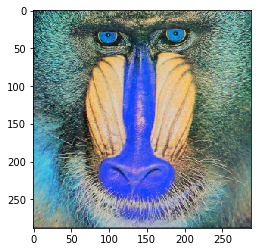

In [5]:
# viewing image
plt.imshow(raw_img)

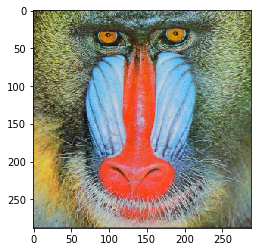

In [6]:
img=cv2.cvtColor(raw_img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
import cv2
img = cv2.imread('img.png')
while True:
    cv2.imshow('img.png',img)

    if cv2.waitKey(1) & 0xFF == 27:
        break


cv2.destroyAllWindows()

In [8]:
# Saving Image
cv2.imwrite('SAVE_img.png',img)

True

### Basic Operations on Images

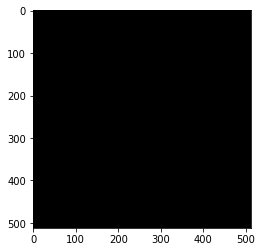

In [9]:
# Creating Blank Image
blank_img=np.zeros(shape=(512,512,3),dtype=np.int16)
plt.imshow(blank_img)

### funtions and Attributes
### cv2.shape(line, rectangle etc)(image,Pt1,Pt2,color,thickness)

#### There are some common arguments which are passed in function to draw shapes on images:

#### Image on which shapes are to be drawn
#### co-ordinates of the shape to be drawn from Pt1(top left) to Pt2(bottom right)
#### Color: The color of the shape that is to be drawn. It is passed as a tuple, eg: (255,0,0). For grayscale, it will be the scale of brightness.
#### The thickness of the geometrical figure.

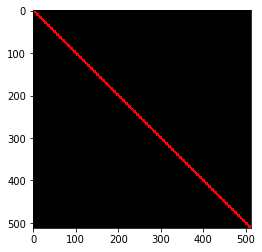

In [10]:
# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(blank_img,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

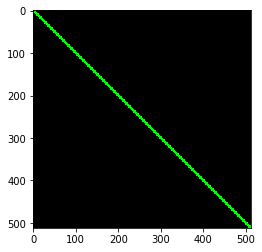

In [11]:
line_green=cv2.line(blank_img,(0,0),(511,511),(0,255,0),5)
plt.imshow(line_green)

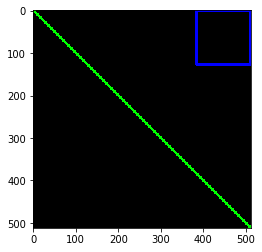

In [12]:
#Draw a blue rectangle with a thickness of 5 px

rectangle= cv2.rectangle(blank_img,(384,0),(510,128),(0,0,255),5)
plt.imshow(rectangle)

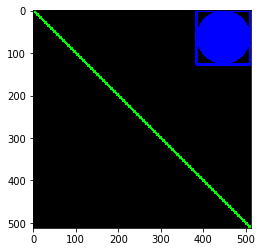

In [13]:
 circle= cv2.circle(blank_img,(447,63), 63, (0,0,255), -1) # -1 corresponds to a filled circle
 plt.imshow(circle)


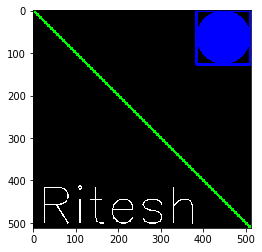

In [15]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(blank_img,'Ritesh',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
plt.imshow(text)

# Face Detection
## Overview
Face detection is a technique that identifies or locates human faces in digital images. A typical example of face detection occurs when we take photographs through our smartphones, and it instantly detects faces in the picture. Face detection is different from Face recognition. Face detection detects merely the presence of faces in an image while facial recognition involves identifying whose face it is. In this article, we shall only be dealing with the former.

Face detection is performed by using classifiers. A classifier is essentially an algorithm that decides whether a given image is positive(face) or negative(not a face). A classifier needs to be trained on thousands of images with and without faces. Fortunately, OpenCV already has two pre-trained face detection classifiers, which can readily be used in a program. The two classifiers are:

Haar Classifier and
Local Binary Pattern(LBP) classifier.


# Face Detection with OpenCV-Python

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

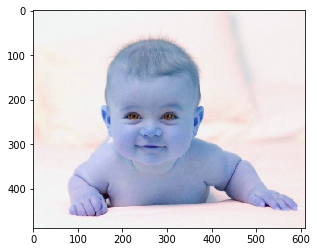

In [6]:
#Loading the image to be tested
test_image = cv2.imread('baby.jpg')
plt.imshow(test_image)

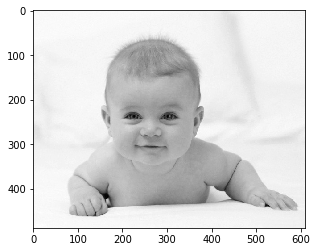

In [9]:
# converting to grey scale
test_gray=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
#Display image 
plt.imshow(test_gray,cmap='gray')

In [15]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [17]:
haar_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [19]:
faces_rects = haar_cascade.detectMultiScale(test_gray, scaleFactor = 1.2, minNeighbors = 5);
print('Faces found: ', len(faces_rects))

Faces found:  1


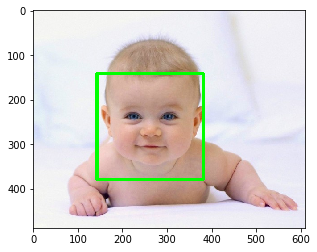

In [24]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(convertToRGB(test_image))

In [46]:
# Face Detection with generalized function
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 5)

    return image_copy

## Testing the function on new image

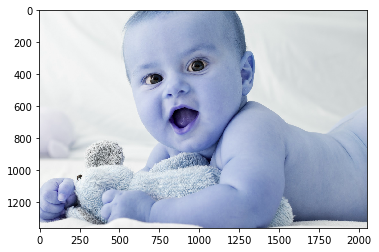

In [32]:
  #loading image
  test_image2 = cv2.imread('baby2.jpg')

  # Converting to grayscale
  test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

  # Displaying grayscale image
  plt.imshow(test_image2, cmap='gray')

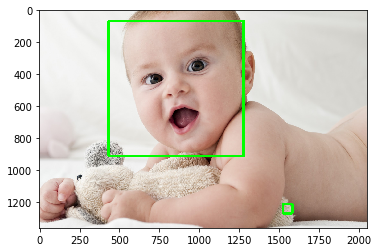

In [37]:
#call the function to detect faces
faces = detect_faces(haar_cascade, test_image2)

 #convert to RGB and display image
plt.imshow(convertToRGB(faces))

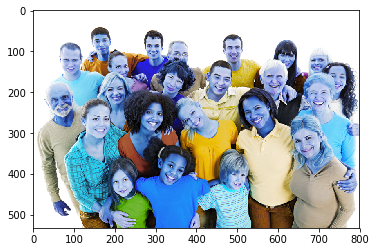

In [44]:
  #loading image
  test_image3 = cv2.imread('group.jpg')

  # Converting to grayscale
  test_image_gray3 = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

  # Displaying grayscale image
  plt.imshow(test_image3, cmap='gray')

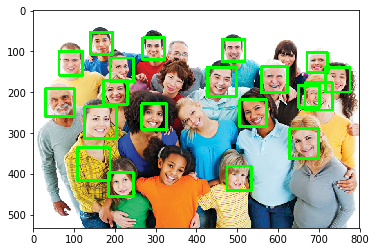

In [47]:
#call the function to detect faces
faces = detect_faces(haar_cascade, test_image3)

 #convert to RGB and display image
plt.imshow(convertToRGB(faces))